In [6]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
import math

plt.rcParams["figure.figsize"] = (20,6)

### Definindo funções

In [7]:
def get_lags(series, lags):
  result = []
  if lags > 0:
    for lag in range(1, lags+1):
    #  print(lag)
    #  print(series.shift(lag))
      result.append(series.shift(lag).rename({series.columns[0]: series.columns[0]+'-'+str(lag)}, axis=1))
    #return result
    return pd.concat(result, axis=1, names=list(range(-1,-lags))).dropna()
  else:
    for lag in range(-1, lags-1,-1):
      #print(lag)
      #print(series.shift(lag))
      result.append(series.shift(lag).rename({series.columns[0]: series.columns[0]+'+'+str(abs(lag))}, axis=1))
    #return result
    return pd.concat(result, axis=1, names=list(range(+1,-lags))).dropna()

In [2]:
def apl_model (df_st,n_lags):

    print('Janela Analizada: ', n_lags,'dias\n')

    X = get_lags(df_st, n_lags)
    y = df_st.reindex(X.index)

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.3)

    parameters = {'kernel':['linear', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'C': [0.1, 10, 100]
             }

    svr = SVR()
    svr_GS = GridSearchCV (svr, parameters, cv = TimeSeriesSplit())
    res = svr_GS.fit(X_train,y_train)

    print('#'*40)
    print('Melhor Score: ', res.best_score_)
    print('Melhores Parametros: ', res.best_params_)
    print('#'*40)

    print('Aplicando o Medelo Para os Melhores Parametros: \n\n\n')

    parameters = {'kernel': [res.best_params_['kernel']],
             'gamma': [res.best_params_['gamma']],
             'C': [res.best_params_['C']]}
    
    svr = SVR()
    svr_GS = GridSearchCV (svr, parameters, cv = TimeSeriesSplit())
    res = svr_GS.fit(X_train,y_train)
    print( res.best_score_, res.best_params_)

    r2 = r2_score(svr_GS.predict(X_test),y_test)
    mse = mean_squared_error(svr_GS.predict(X_test),y_test)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(svr_GS.predict(X_test),y_test)
    mape = mean_absolute_percentage_error(svr_GS.predict(X_test),y_test)

    print('SVR model Results')
    print('r2' ,r2)
    print('mse' , mse)
    print('rmse', rmse)
    print('mae', mae)
    print('mape',  mape)

    fig, ax = plt.subplots()
    ax.plot(svr_GS.predict(X_test).flatten(), label='pred')
    ax.plot(y_test.reset_index(drop=True), label='true')
    plt.title('SVR MODEL')
    plt.legend()
    plt.show()

    
    return r2, mse, rmse,mae, mape
    

In [1]:
def apl_for_lags (df_st):
    janelas = [ 7,15,30]
    results = []

    for janela in janelas:
        r2, mse, rmse,mae, mape = apl_model (df_st, janela)
        result = [r2, mse, rmse,mae, mape]
        results.append(result)

    return results

### Lendo o Dataset

In [13]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')

df_st = df['data_notificacao'].value_counts().rename_axis('Data_notificacao').to_frame('N_casos')
df_st.sort_index(inplace = True)
df_st

C:\Users\gabri\AppData\Local\Temp\ipykernel_14432\2810962173.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')


,N_casos
Data_notificacao,
2020-01-12,1
2020-01-20,3
2020-01-22,1
2020-01-24,1
2020-01-25,1
...,...
2022-06-17,1327
2022-06-18,550
2022-06-19,552


### Aplicando Modelo

In [ ]:
results = apl_for_lags (df_st)

### Resultados

In [ ]:
df_results = pd.DataFrame(results, columns=('R2', 'MSE', 'RMSE','MAE','MAPE' ), index=('7 dias', '15 dias', '30 dias', '45 dias', '60 dias'))
df_results

#### Aplicando o modelo janela de 15

Janela Analizada:  15 dias



C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

########################################
Melhor Score:  0.6832044351197117
Melhores Parametros:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
########################################
Aplicando o Medelo Para os Melhores Parametros: 





C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

0.6832044351197117 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVR model Results
r2 0.7397151696213651
mse 600361.8624963561
rmse 774.8302152706464
mae 421.1650901181807
mape 0.3987264033591947


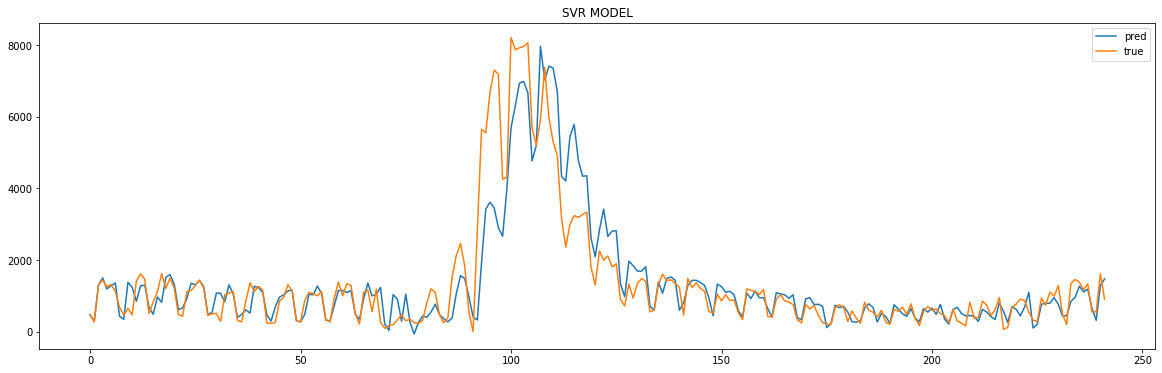

In [19]:
r2, mse, rmse, mape = apl_model (df_st, 15)

#### Aplicando o modelo para diferentes janelas (7,15,30)

In [22]:
results = apl_for_lags (df_st)

Janela Analizada:  30 dias



C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

########################################
Melhor Score:  0.6887405285918711
Melhores Parametros:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
########################################
Aplicando o Medelo Para os Melhores Parametros: 





C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

0.6887405285918711 {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVR model Results
r2 0.7591833743524016
mse 537755.6913355513
rmse 733.3182742408314
mae 394.61085776518615
mape 0.3707797459589473
Janela Analizada:  45 dias



C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

### Resultados

In [ ]:
df_results = pd.DataFrame(results, columns=('R2', 'MSE', 'RMSE','MAE','MAPE' ), index=('7 dias', '15 dias', '30 dias', '45 dias', '60 dias'))
df_results

Aplicando o modelo manualmente

In [10]:
X = get_lags(df_st, 15)
y = df_st.reindex(X.index)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(564, 15)
(564, 1)
(242, 15)
(242, 1)


In [13]:
parameters = {'kernel':['linear', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'C': [0.1, 10, 100]
             }

svr = SVR()
svr_GS = GridSearchCV (svr, parameters, cv = TimeSeriesSplit())
res = svr_GS.fit(X_train,y_train)

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [14]:
index_best = best_scores.index(max(best_scores))

In [15]:
print(best_scores[index_best],'\n',
     best_params[index_best])

-0.9839257711329317 
 {}


In [16]:
parameters = {'kernel':['linear'],
             'gamma': ['scale'],
             'C':[10]}
    
svr = SVR()
svr_GS = GridSearchCV (svr, parameters, cv = TimeSeriesSplit())
res = svr_GS.fit(X_train,y_train)
print( res.best_score_, res.best_params_)

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

0.6832044351197117 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [19]:
print('SVR model Results')
print('r2' ,r2_score(svr_GS.predict(X_test),y_test))
print('mse' ,mean_squared_error(svr_GS.predict(X_test),y_test))
print('rmse', math.sqrt(mean_squared_error(svr_GS.predict(X_test),y_test)))
print('mae', mean_absolute_error(svr_GS.predict(X_test),y_test))
print('MAPE', mean_absolute_percentage_error(svr_GS.predict(X_test),y_test))


SVR model Results
r2 0.7397151696213651
mse 600361.8624963561
rmse 774.8302152706464
mae 421.1650901181807
MAPE 0.3987264033591947


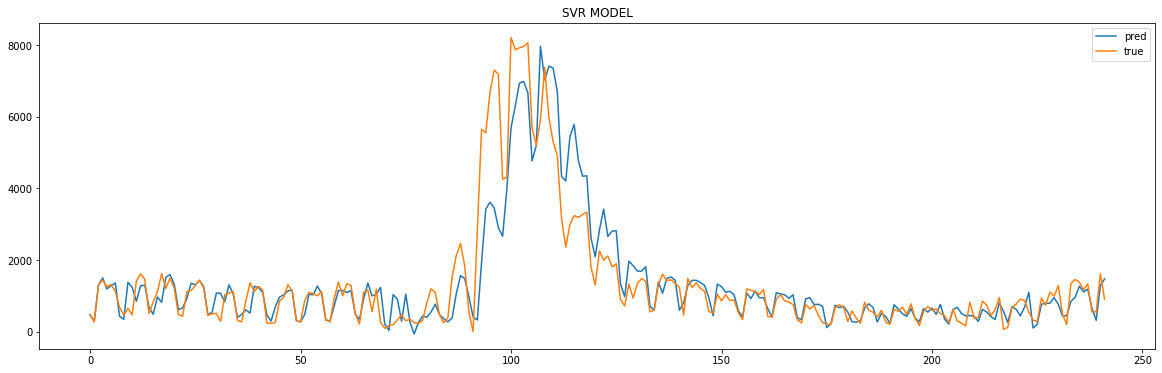

In [23]:
fig, ax = plt.subplots()
ax.plot(svr_GS.predict(X_test).flatten(), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.title('SVR MODEL')
plt.legend()